In [4]:
import pandas as pd
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random

#warnings
import warnings
warnings.filterwarnings("ignore")

# Libraries for TensorFlow
import tensorflow_addons as tfa
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import ReduceLROnPlateau

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.preprocessing import image
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications import ResNet50
#from tensorflow.keras.applications import Xception
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image

import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

In [11]:
main_folder = "D:\\Ecoli\\Dataset_org_new\\train"
class_names=os.listdir(main_folder)
print(class_names)
print("\n")

validation_folder = "D:\\Ecoli\\Dataset_org_new\\valid"
val_class_names=os.listdir(validation_folder)
print(val_class_names)
print("\n")

test_folder = "D:\\Ecoli\\Dataset_org_new\\test"
test_class_names=os.listdir(test_folder)
print(val_class_names)
print("\n")



['no', 'yes']


['no', 'yes']


['no', 'yes']




In [12]:
x=[] # array value of the images
y=[] # the labels of the images

for folder in os.listdir(main_folder):
    image_list=os.listdir(main_folder+"/"+folder)
    for img_name in image_list:
        # Loading images
        img=image.load_img(main_folder+"/"+folder+"/"+img_name,target_size=(256,256))
        img=image.img_to_array(img)
        
        # Transfer Learning: Preprocess of VGG16 model to our images before passing it to VGG16
        img=preprocess_input(img)
        
        x.append(img) # appending image array
        y.append(class_names.index(folder)) # appending class index to the array
        
print("Preparing Training Dataset Completed.")

Preparing Training Dataset Completed.


In [13]:
val_images=[]
val_images_Original=[]
val_image_label=[]

for folder in os.listdir(validation_folder):
    image_list=os.listdir(validation_folder+"/"+folder)
    for img_name in image_list:
        # Loading images
        img=image.load_img(validation_folder+"/"+folder+"/"+img_name,target_size=(256,256))
        
        # Converting to arrarys
        img=image.img_to_array(img)
        
        # Saving original images, will be used just for display at the end
        val_images_Original.append(img.copy())
        img=preprocess_input(img) 
        
        # Appending arrays
        val_images.append(img)
        val_image_label.append(val_class_names.index(folder))
        
print("Preparing Validation Dataset Completed.")

Preparing Validation Dataset Completed.


In [14]:
test_images=[]
test_images_Original=[]
test_image_label=[]
for folder in os.listdir(test_folder):
    image_list=os.listdir(test_folder+"/"+folder)
    for img_name in image_list:
        # Loading images
        img=image.load_img(test_folder+"/"+folder+"/"+img_name,target_size=(256,256))
        
        # Converting to arrarys
        img=image.img_to_array(img)
        
        # Saving original images, will be used just for display at the end
        test_images_Original.append(img.copy())
        img=preprocess_input(img) 
        
        # Appending arrays
        test_images.append(img)
        test_image_label.append(test_class_names.index(folder))
        
print("Preparing Test Dataset Completed.")

Preparing Test Dataset Completed.


In [15]:
# Training Dataset
print("Training Dataset")

x=np.array(x) # Converting to np arrary to pass to the model
print(x.shape)

y=to_categorical(y) # onehot encoding of the labels
# print(y)
print(y.shape)

# Validation Dataset
print("Validation Dataset")

val_images=np.array(val_images) 
print(val_images.shape)

val_image_label=to_categorical(val_image_label) # onehot encoding of the labels)
print(val_image_label.shape)

print("test Dataset")
test_images=np.array(test_images) 
print(test_images.shape)

test_image_label=to_categorical(test_image_label) # onehot encoding of the labels)
print(test_image_label.shape)

Training Dataset
(1000, 256, 256, 3)
(1000, 2)
Validation Dataset
(500, 256, 256, 3)
(500, 2)
test Dataset
(500, 256, 256, 3)
(500, 2)


In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create data generators for training, testing, and validation
'''train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Rescale pixel values to [0, 1]
    rotation_range=20,  # Randomly rotate images by up to 20 degrees
    width_shift_range=0.2,  # Randomly shift the width of images
    height_shift_range=0.2,  # Randomly shift the height of images
    shear_range=0.2,  # Shear transformations
    zoom_range=0.2,  # Zooming inside the image
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest',  # Fill in newly created pixels after rotation or shifting
)'''
train_datagen = ImageDataGenerator(rescale=1.0 / 255)  # Only rescale for training

test_datagen = ImageDataGenerator(rescale=1.0 / 255)
#test_datagen = ImageDataGenerator(rescale=1.0 / 255)  # Only rescale for testing

# Specify the paths to your train, test, and validation directories
train_dir = 'D:\\Ecoli\\Dataset_org_new\\train'
test_dir = 'D:\\Ecoli\\Dataset_org_new\\test'
validate_dir = 'D:\\Ecoli\\Dataset_org_new\\valid'

# Create data generators for each dataset
train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size=32,  # Adjust batch size as needed
    class_mode='categorical',  # Set to 'binary' for binary classification
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    batch_size=32,
    class_mode='categorical',
)

validate_generator = test_datagen.flow_from_directory(
    validate_dir,
    batch_size=32,
    class_mode='categorical',
)


Found 1000 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [17]:
IMAGE_SIZE = (256, 256)

In [24]:
# Make sure to use tensorflow.keras and not keras
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Activation, Dropout, Input, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Model 
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

# Create a VGG16 model
vgg = VGG16(input_shape=IMAGE_SIZE + (3,), weights='imagenet', include_top=False)

# Freeze the pre-trained layers
for layer in vgg.layers:
    layer.trainable = False

# Add your custom layers on top of VGG16
x = keras.layers.Flatten() (vgg.output)
x = keras.layers.Dense(256, activation="relu")(x)
x = keras.layers.Dropout(0.6)(x)
#x = keras.layers.Flatten() (vgg.output)
x = keras.layers.Dense(128, activation="relu")(x)
x = keras.layers.Dropout(0.7)(x)
prediction  = keras.layers.Dense(2, activation="softmax")(x)
#x = Flatten()(vgg.output)
#x = keras.layers.Dropout(0.1)(x)
#prediction = Dense(2, activation='softmax')(x)

# Create the final model
vgg_model = Model(inputs=vgg.input, outputs=prediction)

# Compile the model
#vgg_model.compile(
   # loss='categorical_crossentropy',
   # optimizer='adam',
    #metrics=['accuracy']
#)
vgg_model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])
# Assuming you have data generators set up for train, test, and validation
# You don't need to use xtrain and ytrain directly

# Train the model using fit_generator and specify the data generators
vgg_history = vgg_model.fit_generator(
    train_generator,  # Use your train data generator here
    validation_data=validate_generator,  # Use your validation data generator here
    epochs=15
)

Epoch 1/15
32/32 [==============================] - 232s 7s/step - loss: 2.4061 - categorical_accuracy: 0.7690 - val_loss: 0.0630 - val_categorical_accuracy: 0.9860
Epoch 2/15
32/32 [==============================] - 230s 7s/step - loss: 0.2054 - categorical_accuracy: 0.9470 - val_loss: 0.0402 - val_categorical_accuracy: 0.9900
Epoch 3/15
32/32 [==============================] - 1713s 55s/step - loss: 0.1556 - categorical_accuracy: 0.9520 - val_loss: 0.1430 - val_categorical_accuracy: 0.9840
Epoch 4/15
32/32 [==============================] - 143s 5s/step - loss: 0.1215 - categorical_accuracy: 0.9670 - val_loss: 0.0795 - val_categorical_accuracy: 0.9900
Epoch 5/15
32/32 [==============================] - 143s 5s/step - loss: 0.0745 - categorical_accuracy: 0.9790 - val_loss: 0.1332 - val_categorical_accuracy: 0.9840
Epoch 6/15
32/32 [==============================] - 174s 5s/step - loss: 0.1209 - categorical_accuracy: 0.9730 - val_loss: 0.1704 - val_categorical_accuracy: 0.9840
Epoch 7/

In [ ]:
# Make sure to use tensorflow.keras and not keras
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Activation, Dropout, Input, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Model 
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

# Create a VGG16 model
vgg = VGG16(input_shape=IMAGE_SIZE + (3,), weights='imagenet', include_top=False)

# Freeze the pre-trained layers
for layer in vgg.layers:
    layer.trainable = False

# Add your custom layers on top of VGG16
x = keras.layers.Flatten() (vgg.output)
x = keras.layers.Dense(256, activation="relu")(x)
x = keras.layers.Dropout(0.6)(x)
#x = keras.layers.Flatten() (vgg.output)
x = keras.layers.Dense(128, activation="relu")(x)
x = keras.layers.Dropout(0.7)(x)
prediction  = keras.layers.Dense(2, activation="softmax")(x)
#x = Flatten()(vgg.output)
#x = keras.layers.Dropout(0.1)(x)
#prediction = Dense(2, activation='softmax')(x)

# Create the final model
vgg_model = Model(inputs=vgg.input, outputs=prediction)

# Compile the model
#vgg_model.compile(
   # loss='categorical_crossentropy',
   # optimizer='adam',
    #metrics=['accuracy']
#)
vgg_model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])
# Assuming you have data generators set up for train, test, and validation
# You don't need to use xtrain and ytrain directly

# Train the model using fit_generator and specify the data generators
vgg_history = vgg_model.fit_generator(
    train_generator,  # Use your train data generator here
    validation_data=validate_generator,  # Use your validation data generator here
    epochs=15
)

In [37]:
test_images=[]
test_images_Original=[]
test_image_label=[]
for folder in os.listdir(test_folder):
    image_list=os.listdir(test_folder+"/"+folder)
    for img_name in image_list:
        # Loading images
        img=image.load_img(test_folder+"/"+folder+"/"+img_name,target_size=(256,256))
        
        # Converting to arrarys
        img=image.img_to_array(img)
        
        # Saving original images, will be used just for display at the end
        test_images_Original.append(img.copy())
        img=preprocess_input(img) 
        
        # Appending arrays
        test_images.append(img)
        test_image_label.append(test_class_names.index(folder))
        
print("Preparing Test Dataset Completed.")

test_datagen = ImageDataGenerator(rescale=1.0 / 255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    batch_size=32,
    class_mode='categorical',
)

Preparing Test Dataset Completed.
Found 200 images belonging to 2 classes.


4/4 [==============================] - 9s 2s/step


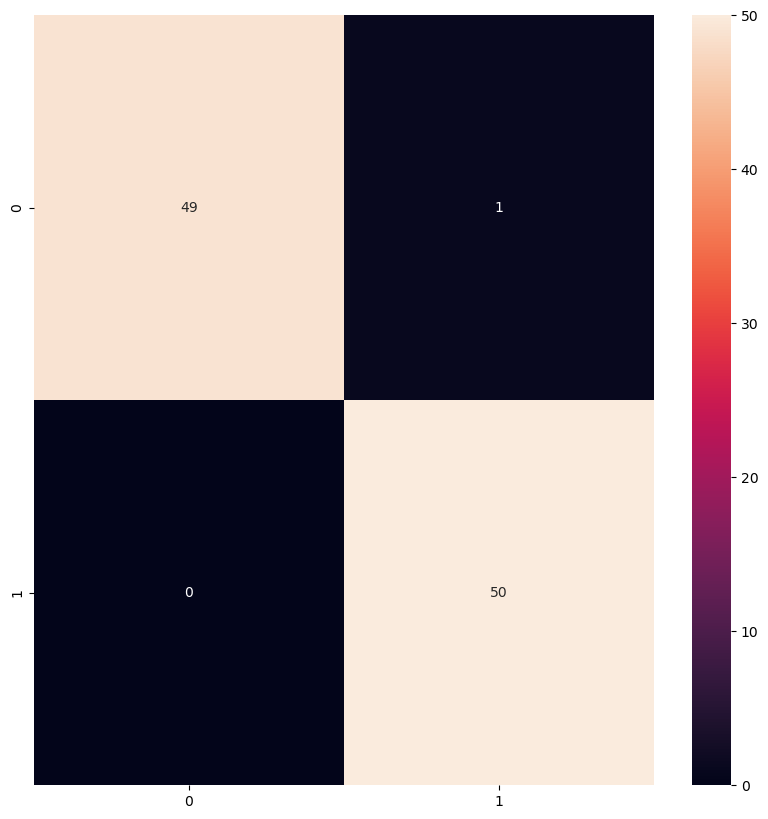

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       0.98      1.00      0.99        50

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



In [36]:
predictions = vgg_model.predict(test_generator)

# Get the true labels from the test data generator
true_labels = test_generator.classes

# Predicted labels are the class with the highest probability
predicted_labels = predictions.argmax(axis=1)

# Calculate the confusion matrix
confusion = confusion_matrix(true_labels, predicted_labels)
#print(cm)
f, ax=plt.subplots(figsize=(10,10))
sns.heatmap(confusion, annot=True)
plt.show()
# Printing the model scores:
print(classification_report(true_labels, predicted_labels))

In [46]:
for i, layer in enumerate(vgg_model.layers):
    print(f"Layer {i}: {layer.name} - {layer.__class__.__name__}")
    print(f"   Input shape: {layer.input_shape}")
    print(f"   Output shape: {layer.output_shape}")
    print(f"   Trainable: {layer.trainable}")
    print()

# Alternatively, you can use model.summary() to get a concise summary
vgg_model.summary()

Layer 0: input_3 - InputLayer
   Input shape: [(None, 256, 256, 3)]
   Output shape: [(None, 256, 256, 3)]
   Trainable: False

Layer 1: block1_conv1 - Conv2D
   Input shape: (None, 256, 256, 3)
   Output shape: (None, 256, 256, 64)
   Trainable: False

Layer 2: block1_conv2 - Conv2D
   Input shape: (None, 256, 256, 64)
   Output shape: (None, 256, 256, 64)
   Trainable: False

Layer 3: block1_pool - MaxPooling2D
   Input shape: (None, 256, 256, 64)
   Output shape: (None, 128, 128, 64)
   Trainable: False

Layer 4: block2_conv1 - Conv2D
   Input shape: (None, 128, 128, 64)
   Output shape: (None, 128, 128, 128)
   Trainable: False

Layer 5: block2_conv2 - Conv2D
   Input shape: (None, 128, 128, 128)
   Output shape: (None, 128, 128, 128)
   Trainable: False

Layer 6: block2_pool - MaxPooling2D
   Input shape: (None, 128, 128, 128)
   Output shape: (None, 64, 64, 128)
   Trainable: False

Layer 7: block3_conv1 - Conv2D
   Input shape: (None, 64, 64, 128)
   Output shape: (None, 64, 64,

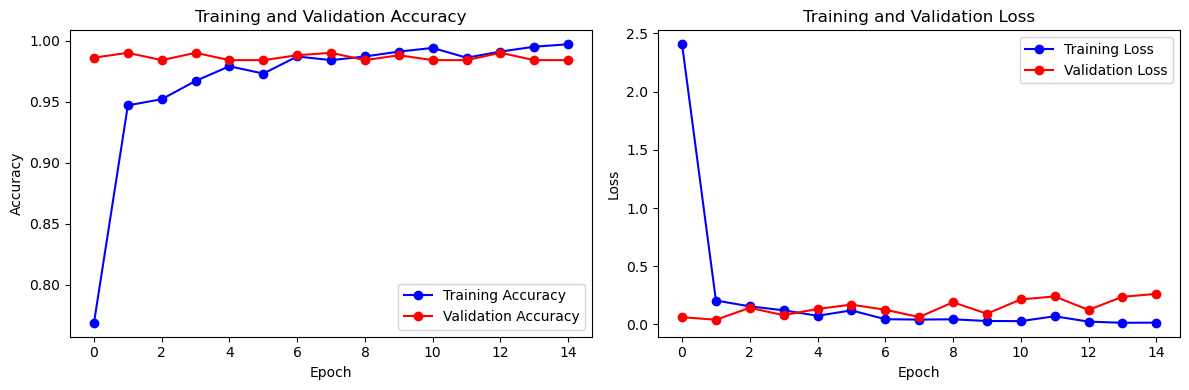

In [34]:
import matplotlib.pyplot as plt

# Access the training history
training_accuracy = vgg_history.history['categorical_accuracy']
validation_accuracy = vgg_history.history['val_categorical_accuracy']
training_loss = vgg_history.history['loss']
validation_loss = vgg_history.history['val_loss']

# Create two subplots for accuracy and loss
plt.figure(figsize=(12, 4))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(training_accuracy, label='Training Accuracy', color='blue', marker='o')
plt.plot(validation_accuracy, label='Validation Accuracy', color='red', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(training_loss, label='Training Loss', color='blue', marker='o')
plt.plot(validation_loss, label='Validation Loss', color='red', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


In [16]:
model_save_path = 'D:\\Ecoli\\vgg16_model-final.h5'
vgg_model.save(model_save_path)

print(f"Model saved to {model_save_path}")

Model saved to D:\Ecoli\vgg16_model-final.h5


In [20]:
import numpy as np

# Extract the training history from efficientNetB7_history
history_dict = vgg_history.history

# Calculate the average accuracy and loss for training and validation
avg_training_accuracy = np.mean(history_dict['categorical_accuracy'])
avg_training_loss = np.mean(history_dict['loss'])
avg_validation_accuracy = np.mean(history_dict['val_categorical_accuracy'])
avg_validation_loss = np.mean(history_dict['val_loss'])

# Print the averages
print("Average Training Accuracy:", avg_training_accuracy)
print("Average Training Loss:", avg_training_loss)
print("Average Validation Accuracy:", avg_validation_accuracy)
print("Average Validation Loss:", avg_validation_loss)

Average Training Accuracy: 0.9548999965190887
Average Training Loss: 0.29480540119111537
Average Validation Accuracy: 0.9860000014305115
Average Validation Loss: 0.13627954609692097


1/1 [==============================] - 0s 404ms/step


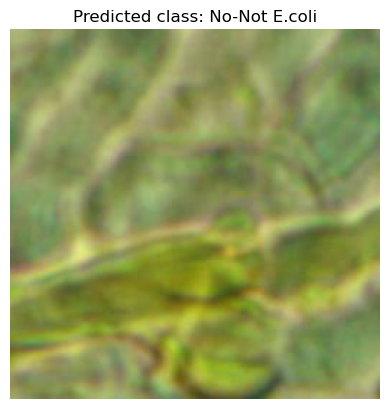

Predicted class: No-Not E.coli
1/1 [==============================] - 0s 310ms/step


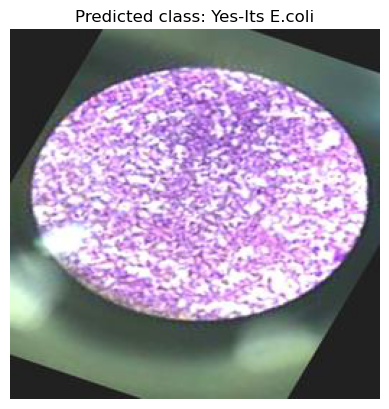

Predicted class: Yes-Its E.coli


In [22]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow import keras


# Load your trained VGG16 model
vgg16_model = keras.models.load_model('D:\\Ecoli\\vgg16_model-final.h5')  # Replace with your model's file path

# Load and preprocess the image you want to predict
img_path = 'D:\\Ecoli\\Dataset_org_new\\test\\no\\img66.jpg'  # Replace with the path to your test image
img = image.load_img(img_path, target_size=(256,256))  # Assuming VGG16 expects 224x224 images
img_array = image.img_to_array(img)
img_array = img_array / 255.0  # Rescale pixel values to [0, 1]

# Expand the dimensions to match the input shape expected by the model (batch size of 1)
img_array = np.expand_dims(img_array, axis=0)

# Make predictions
predictions = vgg16_model.predict(img_array)

# Get the predicted class (the class with the highest probability)
predicted_class = np.argmax(predictions, axis=1)

# You can map the predicted class to a class label if you have a mapping
class_labels = ['No-Not E.coli', 'Yes-Its E.coli']  # Replace with your class labels
predicted_label = class_labels[predicted_class[0]]

plt.imshow(img)
plt.title(f"Predicted class: {predicted_label}")
plt.axis('off')  # Turn off axis labels
plt.show()

print(f"Predicted class: {predicted_label}")


import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow import keras


# Load your trained VGG16 model
vgg16_model = keras.models.load_model('D:\\Ecoli\\vgg16_model-final.h5')  # Replace with your model's file path

# Load and preprocess the image you want to predict
img_path = 'D:\\Ecoli\\Dataset_org_new\\test\\yes\\113.jpg'  # Replace with the path to your test image
img = image.load_img(img_path, target_size=(256,256))  # Assuming VGG16 expects 224x224 images
img_array = image.img_to_array(img)
img_array = img_array / 255.0  # Rescale pixel values to [0, 1]

# Expand the dimensions to match the input shape expected by the model (batch size of 1)
img_array = np.expand_dims(img_array, axis=0)

# Make predictions
predictions = vgg16_model.predict(img_array)

# Get the predicted class (the class with the highest probability)
predicted_class = np.argmax(predictions, axis=1)

# You can map the predicted class to a class label if you have a mapping
class_labels = ['No-Not E.coli', 'Yes-Its E.coli']  # Replace with your class labels
predicted_label = class_labels[predicted_class[0]]

plt.imshow(img)
plt.title(f"Predicted class: {predicted_label}")
plt.axis('off')  # Turn off axis labels
plt.show()

print(f"Predicted class: {predicted_label}")




1/1 [==============================] - 0s 244ms/step


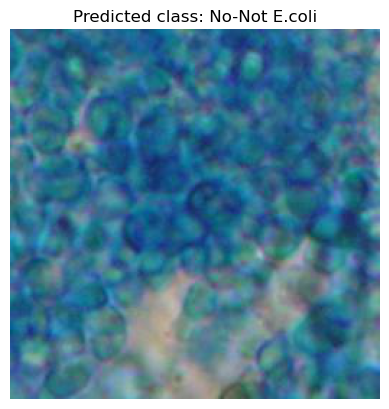

Predicted class: No-Not E.coli
1/1 [==============================] - 0s 238ms/step


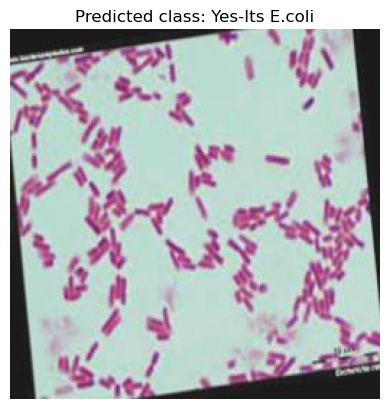

Predicted class: Yes-Its E.coli


In [9]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow import keras
import matplotlib.pyplot as plt


# Load your trained VGG16 model
vgg16_model = keras.models.load_model('D:\\Ecoli\\vgg16_model-final.h5')  # Replace with your model's file path

# Load and preprocess the image you want to predict
img_path = 'D:\\Ecoli\\Dataset_org_new\\test\\no\\img194.jpg'  # Replace with the path to your test image
img = image.load_img(img_path, target_size=(256,256))  # Assuming VGG16 expects 224x224 images
img_array = image.img_to_array(img)
img_array = img_array / 255.0  # Rescale pixel values to [0, 1]

# Expand the dimensions to match the input shape expected by the model (batch size of 1)
img_array = np.expand_dims(img_array, axis=0)

# Make predictions
predictions = vgg16_model.predict(img_array)

# Get the predicted class (the class with the highest probability)
predicted_class = np.argmax(predictions, axis=1)

# You can map the predicted class to a class label if you have a mapping
class_labels = ['No-Not E.coli', 'Yes-Its E.coli']  # Replace with your class labels
predicted_label = class_labels[predicted_class[0]]

plt.imshow(img)
plt.title(f"Predicted class: {predicted_label}")
plt.axis('off')  # Turn off axis labels
plt.show()

print(f"Predicted class: {predicted_label}")


import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow import keras


# Load your trained VGG16 model
vgg16_model = keras.models.load_model('D:\\Ecoli\\vgg16_model-final.h5')  # Replace with your model's file path

# Load and preprocess the image you want to predict
img_path = 'D:\\Ecoli\\Dataset_org_new\\test\\yes\\184.jpg'  # Replace with the path to your test image
img = image.load_img(img_path, target_size=(256,256))  # Assuming VGG16 expects 224x224 images
img_array = image.img_to_array(img)
img_array = img_array / 255.0  # Rescale pixel values to [0, 1]

# Expand the dimensions to match the input shape expected by the model (batch size of 1)
img_array = np.expand_dims(img_array, axis=0)

# Make predictions
predictions = vgg16_model.predict(img_array)

# Get the predicted class (the class with the highest probability)
predicted_class = np.argmax(predictions, axis=1)

# You can map the predicted class to a class label if you have a mapping
class_labels = ['No-Not E.coli', 'Yes-Its E.coli']  # Replace with your class labels
predicted_label = class_labels[predicted_class[0]]

plt.imshow(img)
plt.title(f"Predicted class: {predicted_label}")
plt.axis('off')  # Turn off axis labels
plt.show()

print(f"Predicted class: {predicted_label}")




In [6]:
!pip install matplotlib

In [44]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    batch_size=32,
    class_mode='categorical',  # Adjust this based on your dataset
    shuffle=False  # Don't shuffle the data for evaluation
)

# Make predictions on the test data
predictions = vgg_model.predict_generator(test_generator)

# Get the true labels from the generator
true_labels = test_generator.classes

# Convert the predicted probabilities to class labels (0 or 1)
predicted_labels = np.argmax(predictions, axis=1)

# Calculate accuracy
accuracy = np.mean(predicted_labels == true_labels)

print(f'Test Accuracy: {accuracy * 100:.2f}%')

Found 200 images belonging to 2 classes.
Test Accuracy: 99.50%
